In [8]:
'''
Code for the toutnament and the "iterated tournament" with a simple evolution of the participants: the looser is 
eliminated and one more participants with the same stategy of the winner is addes
'''

import itertools

#Function for the tournament
def tournament(participants={},N_gironi=1,N_rounds = 10, M = Payoff):
    
    # Retrieve only the names of the strategies repeated as many times as their frequency allows.
    player_list_from_dict = []
    for item in (list(participants.keys())):
        for i in range (participants[item]):
            player_list_from_dict.append(item)
            
    # Compute the combinations
    b = list(itertools.combinations(player_list_from_dict, 2))
    N_match = len(b)
    
    # List that will be used to have the scores of each match by the side of the two opponents
    list_with_scores = b
    
    # Loop over the combinations one by one
    for i in range (N_match):
        
        # Player1 and Player2 strategies
        player1 = b[i][0]
        player2 = b[i][1]
        
        # Player1 and Player2 parameters: [0] is the frequency, [1] is the list of parameters
        #param1  = participants[player1][1]
        #param2  = participants[player2][1]
        
        # Initiliaze an empty list to store the results over the match
        AllRewards = []
        
        # Do the match between the two players and update the rewards; The ordered syntax for match is:
        # match( key_1, key_2, parameter_list_1, parameter_list_2, N_rounds = 10, M = Payoff ) : 
        AllRewards =  match(player1, player2, N_rounds, M)
        
        # Retrieve the final scores for Player1 and Player2 as the last element in the list
        R1, R2 = AllRewards[-1][0], AllRewards[-1][1]
        list_with_scores[i] += (R1,R2)
        
    # Un-comment the following print to debug
    #for item in list_with_scores: print(item)
    
    # Good, now each combination has the corresponding score: we now need to assign it to the respective players and calculate the final score
    strat = list(participants.keys())
    freq = [participants[key] for key in strat]
    named =[]
    
    # Add identification to the layer trough the use of a numerical value from 1 up to their frequency BUT PRESERVE THE ORDER
    for key,f in zip (strat,freq):
        for j in range(1,f+1):
            if (f!=0):
                named.append(key + str(j))
                
    # Compute the permutations preserving the order
    with_names = list(itertools.combinations(named,2))
    
    # Copy the scores for each match over to the ones with identification
    # In list_with_scores[I][J] we have: I = ordered number of the combination, and J:
    # J=0 is 1st strategy; J=1 is 2nd strategy; J=2 is Player1 score; J=3 is Player2 score
    for i in range (N_match): with_names[i] += (list_with_scores[i][2],list_with_scores[i][3] )
    
    # Un-comment the following print to debug
    #for item in with_names: print(item)

    # Compute the score for each named player and add it to the list
    FinalScores = []
    for player in named:
        SumOver1 = np.sum([ with_names[i][2] for i in range (N_match) if (with_names[i][0] == player) ])
        SumOver2 = np.sum([ with_names[i][3] for i in range (N_match) if (with_names[i][1] == player) ])
        FinalScores.append(SumOver1 + SumOver2)
        
    Results = named
    
    for i in range (len(Results)):
        Results[i] = (Results[i],FinalScores[i])
    #Results += tuple( FinalScores )

    # return an ordered list of tuple with the name of the winner (his strategy) and the score. The first is the winner, the last the looser
    return ( sorted(Results, key=lambda x: x[1], reverse=True) )    


In [9]:
# Tournament function test
test_part = {
    'NiceGuy' : 2,
    'BadGuy' : 1,
    'MainlyNice' : 1,
    'MainlyBad' : 1,
    'TitForTat' : 1,
    'RandomGuy' : 1,
    'ResentfulGuy' : 1,
    'TrustingGuy' : 1,
    'Thanos' : 1,
    'MidResentful': 1,
    'ReverseTft': 0
}


result = tournament(test_part,N_gironi=1,N_rounds = 100, M = Payoff)
for item in result: print(item) 
len(test_part)

('BadGuy1', 1750)
('MainlyBad1', 1734)
('MidResentful1', 1686.0)
('ResentfulGuy1', 1671)
('TitForTat1', 1558)
('TrustingGuy1', 1544)
('RandomGuy1', 1385)
('Thanos1', 1381)
('NiceGuy1', 1366.0)
('NiceGuy2', 1342)
('MainlyNice1', 1242)


11

In [24]:
# The iterated tournament function is slightly different; Inside the function the tournament is repeated thanks to a 
# while loop and the result is a list of lists of tuples with the final scores of each tournament

#Try to iterate the tournament process: new parameter "r" to set the number of iterations of the tournament
def r_tournament(participants={},N_gironi=1,N_rounds = 10, r=50, M = Payoff):
    
    #set a counter for the while loop
    t_counter = 0 
    #array to store all the results of each tournamen
    classification = [] 
    # create a data frame to memorize the strategies at the start of each tournament
    data_frames = []
    time_evolution_0 = pd.DataFrame(list(participants.items()),columns = ['Strategies','N'])
    time_evolution_0['tournament'] = t_counter 
    data_frames.append(time_evolution_0)

    # start the while loop in order to iterate the tournament. The number of iterations is set at the start (default r=5)
    while t_counter < r:
        
        # Call the function to play the tournament and append the results 
        classification.append(tournament(participants))
        
        #Update the participants dictionary: remove the last classified and add one more player with the winning strategy
        looser = classification[t_counter][-1][0] 
        winner = classification[t_counter][0][0]
        
        #retrieve the strategy name to eliminate/increase in the dictionary removing the numerical characters
        l_strategy = ''.join([char for char in looser if char.isalpha()])
        w_strategy = ''.join([char for char in winner if char.isalpha()])
        
        #increase/decrease the presence of the winner/looser strategies
        participants[l_strategy] -= 1
        participants[w_strategy] += 1

        #test
        #time_evolution['tournament'] += t_counter

        #update the counter 
        t_counter += 1 

        #update the data frame for the time evolution with a new column
        #new_line = [ s[1] for s in list(participants.items())]
        #time_evolution.loc[len(time_evolution)] = new_line
        time_evolution_i = pd.DataFrame(list(participants.items()),columns = ['Strategies','N'])
        time_evolution_i['tournament'] = t_counter 
        data_frames.append(time_evolution_i)

    data_frame_tot = pd.concat(data_frames, axis=0)
    
    return ( classification, data_frame_tot )  

In [25]:
import pandas as pd

# Iterated tournament function test
test_part = {
    'NiceGuy' : 4,
    'BadGuy' : 2,
    'MainlyNice' : 1,
    'MainlyBad' : 2,
    'TitForTat' : 5,
    'RandomGuy' : 4,
    'ResentfulGuy' : 4,
    'TrustingGuy' : 3,
    'Thanos' : 2,
    'MidResentful': 2,
    'ReverseTft': 1
}



result, time_evolution = r_tournament(test_part,N_gironi=1,N_rounds = 100, M = Payoff)


In [12]:
time_evolution

,Strategies,N,tournament
0,NiceGuy,4,0
1,BadGuy,2,0
2,MainlyNice,1,0
3,MainlyBad,2,0
4,TitForTat,5,0
...,...,...,...
6,ResentfulGuy,8,20
7,TrustingGuy,0,20
8,Thanos,0,20
9,MidResentful,13,20


<BarContainer object of 11 artists>

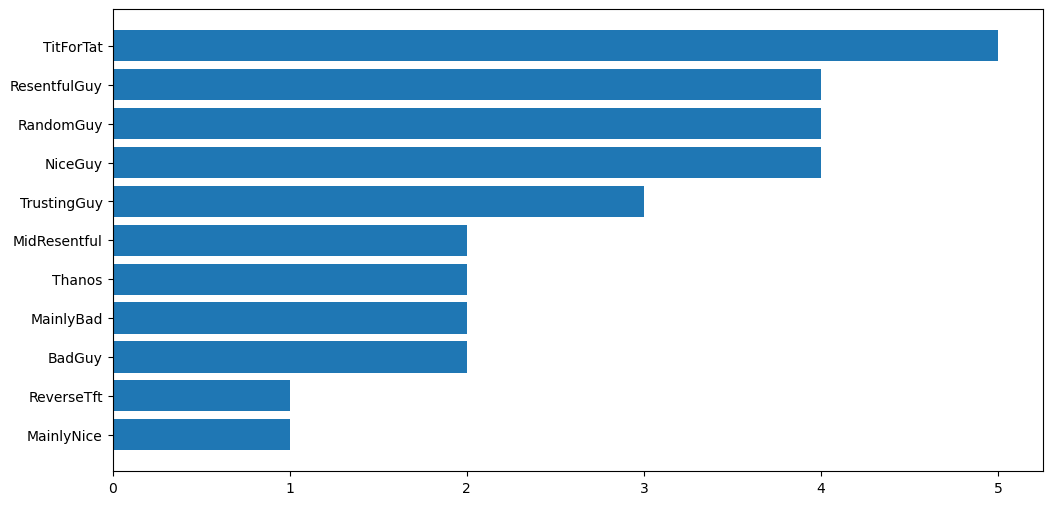

In [53]:
import matplotlib.pyplot as plt
import matplotlib. animation as animation

#frame = time_evolution_tot['tournament'].unique()

fig, ax = plt.subplots(figsize=(12,6))

#def animate(frame):
#    ax.clear()
data_frame = time_evolution[time_evolution['tournament']==0]
top_strategies = data_frame.nlargest(len(test_part),'N').sort_values('N',ascending=True)
ax.barh(top_strategies['Strategies'],top_strategies['N'])
    #ax.set_title(f'Time Step: {i}')
    #ax.set_xlim(0, time_evolution.values.max() + 1)  # Imposta il limite dell'asse x per una visualizzazione coerente


#anim = animation.FuncAnimation(fig, animate, frames=frame, interval=500)
#plt.show()


Frame: 0
      Strategies  N  tournament
0        NiceGuy  4           0
1         BadGuy  2           0
2     MainlyNice  1           0
3      MainlyBad  2           0
4      TitForTat  5           0
5      RandomGuy  4           0
6   ResentfulGuy  4           0
7    TrustingGuy  3           0
8         Thanos  2           0
9   MidResentful  2           0
10    ReverseTft  1           0
Frame: 0
      Strategies  N  tournament
0        NiceGuy  4           0
1         BadGuy  2           0
2     MainlyNice  1           0
3      MainlyBad  2           0
4      TitForTat  5           0
5      RandomGuy  4           0
6   ResentfulGuy  4           0
7    TrustingGuy  3           0
8         Thanos  2           0
9   MidResentful  2           0
10    ReverseTft  1           0
Frame: 1
      Strategies  N  tournament
0        NiceGuy  3           1
1         BadGuy  2           1
2     MainlyNice  1           1
3      MainlyBad  2           1
4      TitForTat  5           1
5      Random

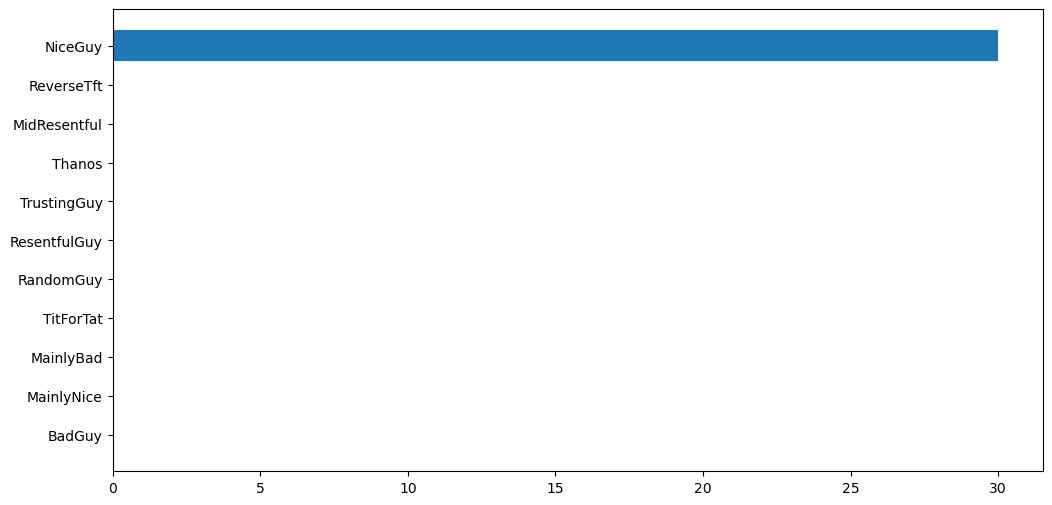

In [26]:
import matplotlib.pyplot as plt
import matplotlib. animation as animation

frame = time_evolution['tournament'].unique()

fig, ax = plt.subplots(figsize=(12,6))

def animate(frame):
    ax.clear()
    data_frame = time_evolution[time_evolution['tournament'] == frame]

    # Debugging output per verificare i dati
    print(f"Frame: {frame}")
    print(data_frame)

    if not data_frame.empty:
        sorted_strategies = data_frame.nlargest(11,'N').sort_values('N',ascending=True)
        ax.barh(sorted_strategies['Strategies'],sorted_strategies['N'])
    else:
        print(f"No data for tournament: {frame}")

global anim
anim = animation.FuncAnimation(fig, animate, frames=frame, interval=500)

# Salva l'animazione in un file .gif usando Pillow
anim.save('animazione.gif', writer='pillow')

# Mostra l'animazione
plt.show()

# Ritorna l'oggetto animazione per evitare che venga garbage collected
anim



In [27]:
df = pd.DataFrame(list(test_part.items()), columns=['Strategies','N'])
df['tournament']=0
print(df)

      Strategies   N  tournament
0        NiceGuy  10           0
1         BadGuy   1           0
2     MainlyNice   0           0
3      MainlyBad   0           0
4      TitForTat  10           0
5      RandomGuy   0           0
6   ResentfulGuy   8           0
7    TrustingGuy   0           0
8         Thanos   4           0
9   MidResentful  41           0
10    ReverseTft   0           0


In [20]:
#Try

import pandas as pd

test_part = {
    'NiceGuy' : 10,
    'BadGuy' : 15,
    'MainlyNice' : 0,
    'MainlyBad' : 5,
    'TitForTat' : 6,
    'RandomGuy' : 6,
    'ResentfulGuy' : 21,
    'TrustingGuy' : 15,
    'Thanos' : 8,
    'MidResentful': 13,
    'ReverseTft': 9
}

p = np.array([ par[1] for par in list(test_part.items())])
time_evolution = pd.DataFrame([test_part])
print(time_evolution)

print(np.shape(p.reshape(1,-1)))

   NiceGuy  BadGuy  MainlyNice  MainlyBad  TitForTat  RandomGuy  ResentfulGuy  \
0       10      15           0          5          6          6            21   

   TrustingGuy  Thanos  MidResentful  ReverseTft  
0           15       8            13           9  
(1, 11)


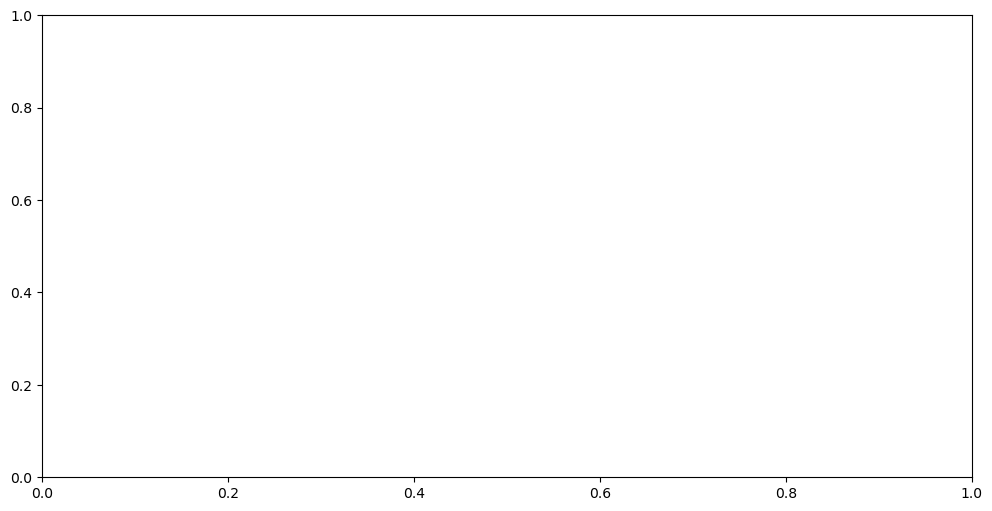

In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Supponiamo di avere il DataFrame 'time_evolution' dal codice precedente
data = {
    'StrategyA': [3, 3, 4, 5],
    'StrategyB': [3, 2, 2, 1],
    'StrategyC': [3, 4, 3, 3]
}
time_evolution = pd.DataFrame(data)

# Crea una figura e un insieme di assi
fig, ax = plt.subplots(figsize=(12, 6))

def animate(i):
    ax.clear()
    ax.barh(time_evolution.columns, time_evolution.iloc[i])
    ax.set_title(f'Iterazione {i + 1}')
    ax.set_xlim(0, time_evolution.values.max() + 1)  # Imposta il limite dell'asse x

# Crea l'animazione

anim = animation.FuncAnimation(fig, animate, frames=len(time_evolution), interval=500, repeat=False)

# Mostra l'animazione
plt.show()
anim